# Домашняя работа
Выполнил студент Б9122-01.03.02мкт Стрельцов Илья Дмитриевич

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import os

In [18]:
def identity(x):
    return x

def step_function(x):
    return np.where(x >= 0, 1, 0)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

def arctan(x):
    return np.arctan(x)

def neuron_output(X, w, b, activation='step'):
    z = np.dot(X, w) + b

    match activation:
        case 'sigmoid':
            return sigmoid(z)
        case 'tanh':
            return tanh(z)
        case 'arctan':
            return arctan(z)
        case 'identity':
            return identity(z)
        case 'step':
            return step_function(z)
    return sigmoid(z)

def plot_decision_boundary(w, b, activation='step'):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    Z = neuron_output(np.c_[xx.ravel(), yy.ravel()], w, b, activation)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.2, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
    plt.title(activation)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()

In [19]:
SIZE = 100
SEED = 555

LEARNING_RATE = 0.001
EPOCHS = 20

ACTIVATION_FUNCTIONS = ['identity', 'step', 'sigmoid', 'tanh', 'arctan']

In [20]:
np.random.seed(SEED)

class_1 = np.random.randn(SIZE, 2) + np.array([-2, -2])
class_2 = np.random.randn(SIZE, 2) + np.array([2, 2])

X = np.vstack((class_1, class_2))
y = np.array([0]*SIZE + [1]*SIZE)

w = np.random.randn(2)
b = 0


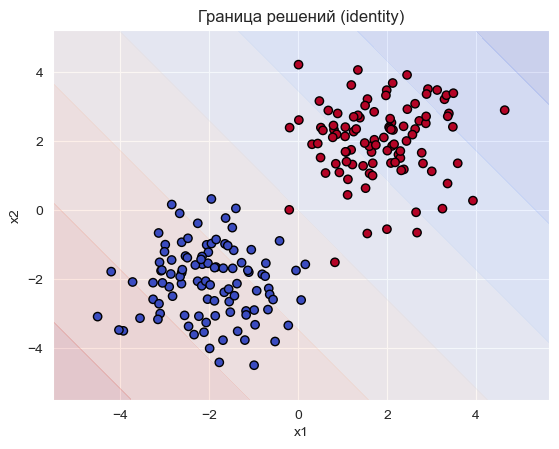

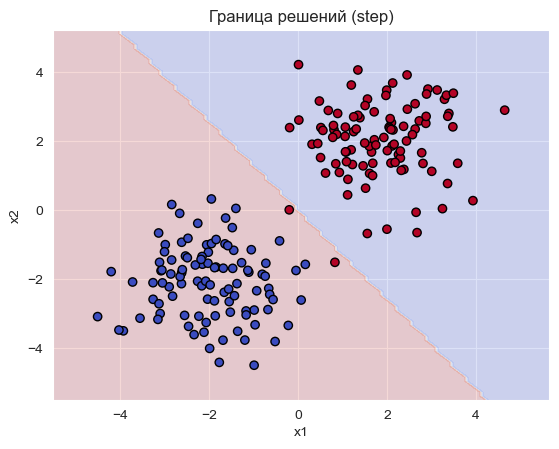

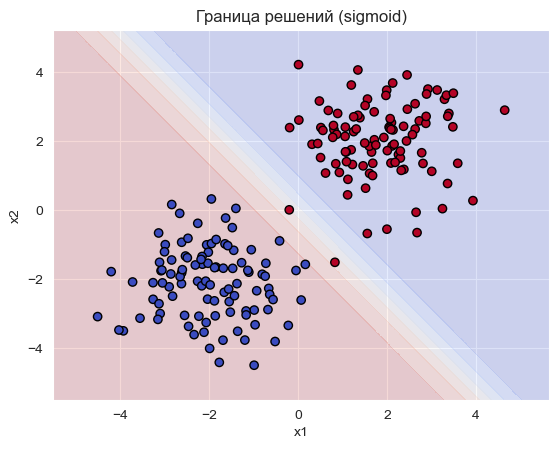

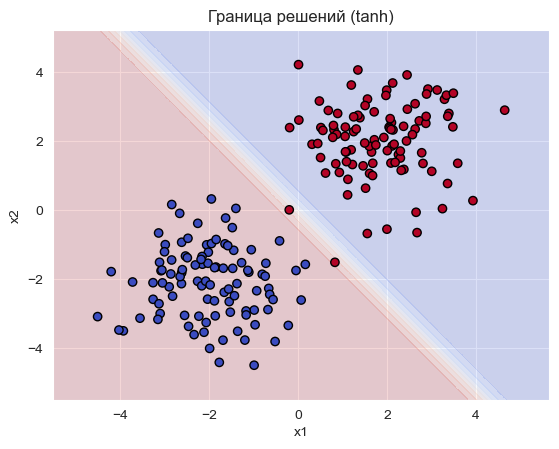

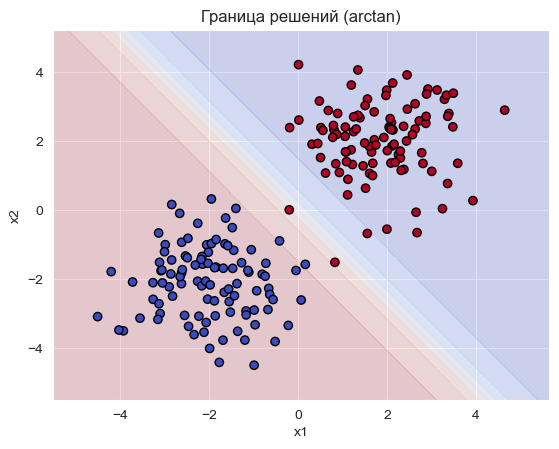

In [21]:
print('Границы решений до обучения')
for activation in ACTIVATION_FUNCTIONS:
    plot_decision_boundary(w, b, activation)

In [22]:
w_initial = w.copy()
b_initial = b

losses = []

for epoch in range(EPOCHS):
    for i in range(len(X)):
        z = np.dot(X[i], w) + b
        y_pred = 1 if z >= 0 else 0  # Ступенчатая функция
        error = y[i] - y_pred
        w += LEARNING_RATE * error * X[i]
        b += LEARNING_RATE * error

    preds = np.array([1 if np.dot(x, w) + b >= 0 else 0 for x in X])
    acc = (preds == y).mean()
    losses.append(1 - acc)
    print(f"Эпоха {epoch+1}/{EPOCHS} — точность: {acc:.4f}")

Эпоха 1/20 — точность: 0.0100
Эпоха 2/20 — точность: 0.0100
Эпоха 3/20 — точность: 0.0050
Эпоха 4/20 — точность: 0.0050
Эпоха 5/20 — точность: 0.3850
Эпоха 6/20 — точность: 0.8550
Эпоха 7/20 — точность: 0.9100
Эпоха 8/20 — точность: 0.9250
Эпоха 9/20 — точность: 0.9400
Эпоха 10/20 — точность: 0.9400
Эпоха 11/20 — точность: 0.9500
Эпоха 12/20 — точность: 0.9600
Эпоха 13/20 — точность: 0.9700
Эпоха 14/20 — точность: 0.9700
Эпоха 15/20 — точность: 0.9700
Эпоха 16/20 — точность: 0.9750
Эпоха 17/20 — точность: 0.9750
Эпоха 18/20 — точность: 0.9750
Эпоха 19/20 — точность: 0.9750
Эпоха 20/20 — точность: 0.9850


Границы решений ПОСЛЕ обучения:


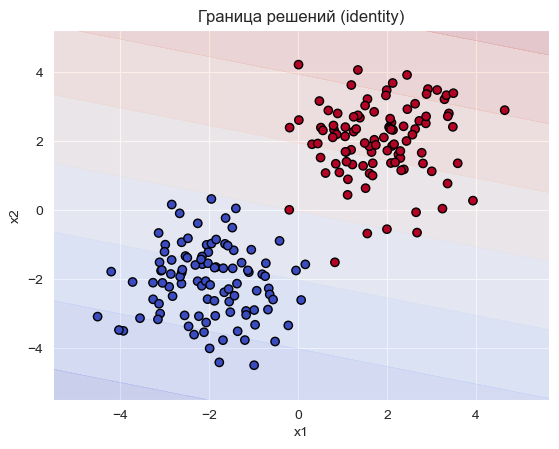

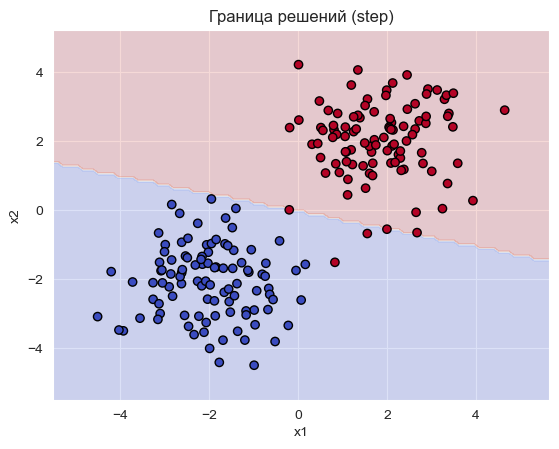

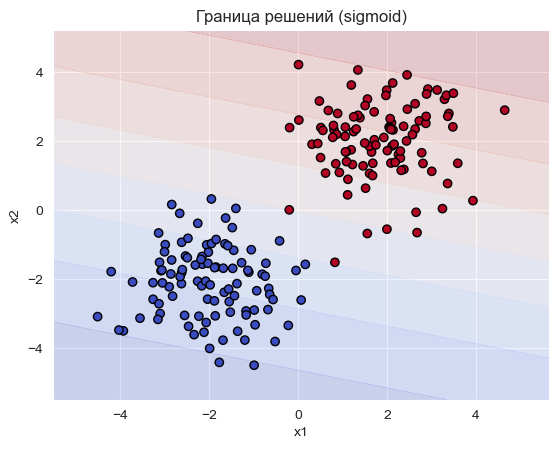

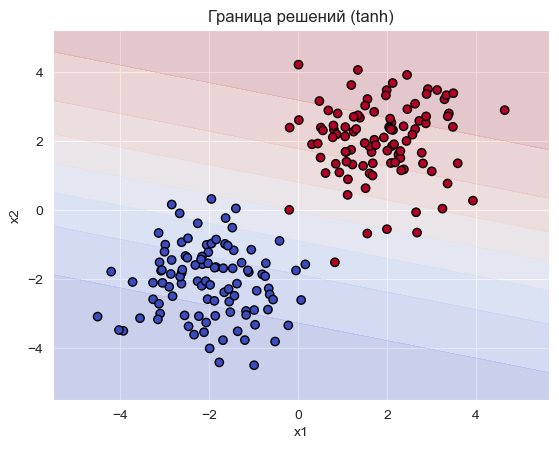

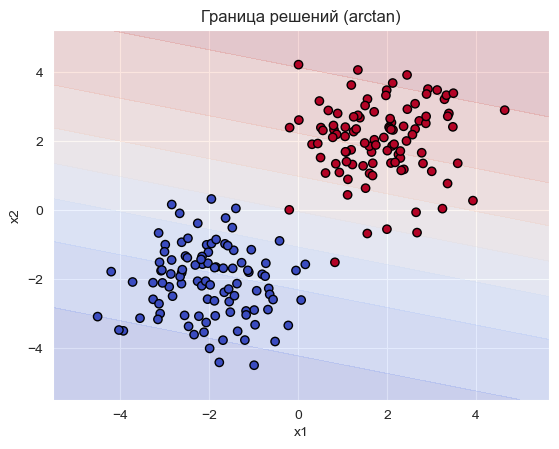

In [23]:
print("Границы решений ПОСЛЕ обучения:")
for activation in ACTIVATION_FUNCTIONS:
    plot_decision_boundary(w, b, activation)

In [24]:
print("Точность для разных функций активации после обучения:")
for activation in ACTIVATION_FUNCTIONS:
    outputs = neuron_output(X, w, b, activation)
    if activation in ['identity', 'tanh', 'arctan']:
        # Для этих функций используем порог 0
        y_pred = (outputs > 0).astype(int)
    else:
        # Для step и sigmoid используем порог 0.5
        y_pred = (outputs > 0.5).astype(int)

    acc = (y_pred == y).mean()
    print(f"{activation}: {acc:.4f}")

Точность для разных функций активации после обучения:
identity: 0.9850
step: 0.9850
sigmoid: 0.9850
tanh: 0.9850
arctan: 0.9850


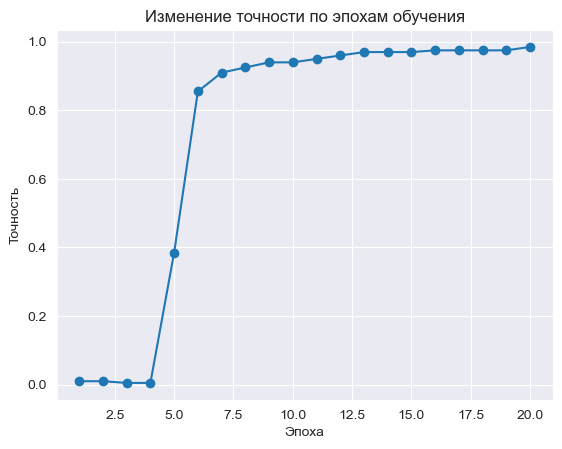

In [25]:
# Визуализация изменения точности
plt.plot(range(1, EPOCHS + 1), [1 - l for l in losses], marker='o')
plt.title('Изменение точности по эпохам обучения')
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.grid(True)
plt.show()

1. Что делает функция активации в искусственном нейроне
2. Чем отличается искусственный нейрон от однослойного перцептрона?
3. Какое правило используется для обучения перцептрона?
4. Почему однослойный перцептрон не может решить задачу XOR?
5. Что произойдет, если изменить функцию активации с сигмоиды на ReLU?
